In [176]:
# 1.technique
  # frequency

## so yes to replace missing value to most frequent value by mode
## cons is only is that  it disturbed the distribution chart


# 2.technique
# we in any column missing is more  than 10 percent
# repacing missing values by  "missing" words

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [177]:
 v = pd.read_csv('/content/train (1).csv')

In [178]:
v.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [179]:
 v = pd.read_csv('/content/train (1).csv' , usecols = ['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [180]:
v

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [181]:
v.isnull().mean()*100
# fire place and garage qual have 47 and 5 percent
# missing values respectively

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'Number of houses')

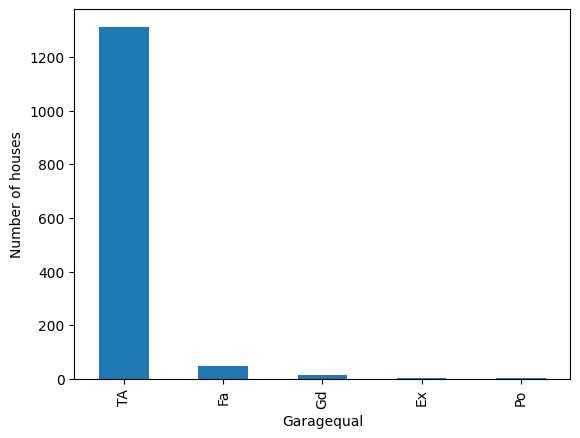

In [182]:
v['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('Garagequal')
plt.ylabel('Number of houses')
## this syntax plot the category of garage in descending order
# means whom category is more freqent in garage column..
## will be plot first

In [183]:
v['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

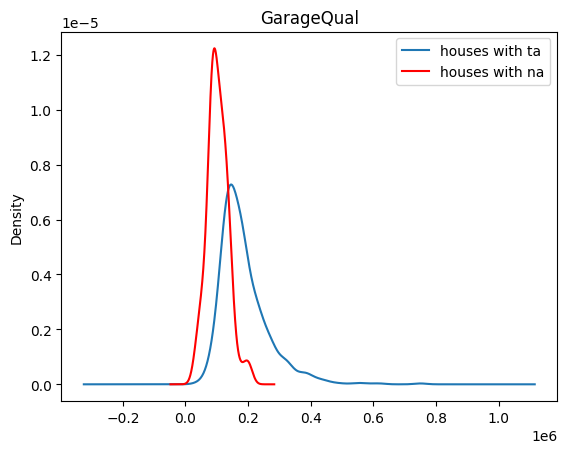

In [184]:
fig = plt.figure()
ax = fig.add_subplot(111)

# How house prices behave when garage quality is 'TA'
          # versus
# when garage quality is missing

# kde = kernal density estimation


# Using ax=ax lets you:
# Add multiple plots (like KDE for TA and Missing) on the same chart
# Compare them easily


v[v['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde' , ax = ax)
v[v['GarageQual'].isnull()]['SalePrice'].plot(kind = 'kde' , ax = ax , color = 'red')

lines , labels = ax.get_legend_handles_labels()
labels = ['houses with ta' , 'houses with na']
ax.legend(lines , labels , loc = 'best')
plt.title('GarageQual')

## since  ta is coming more frequent and na is more than ta ...since
## we replace na by ta  category

In [185]:

temp = v[v['GarageQual'] =='TA']['SalePrice']

## temp is just a temporary variable name.
## It holds intermediate results —
## in this case, the SalePrice values of houses with GarageQual == 'TA'.

In [186]:

v['GarageQual'].fillna('TA', inplace = True )
# misssing value will be re;laced by mode value
# herre fillna which is methods of pandas  used for missing problems
## All the NaN values in GarageQual will be gone — replaced by 'TA'.

<Axes: xlabel='GarageQual'>

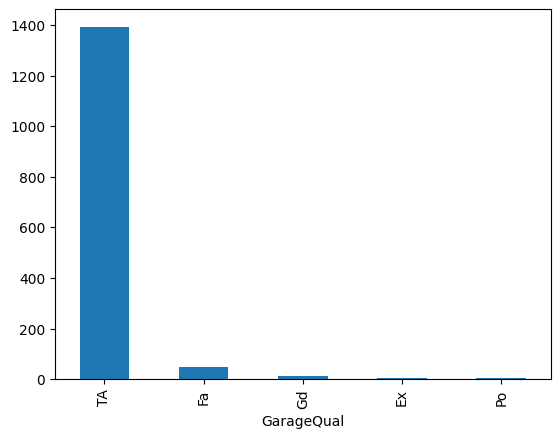

In [187]:
v['GarageQual'].value_counts().plot(kind = 'bar')
## here we could see that ta categories increased  after replacing
## null into ta categories

Text(0.5, 1.0, 'GarageQual')

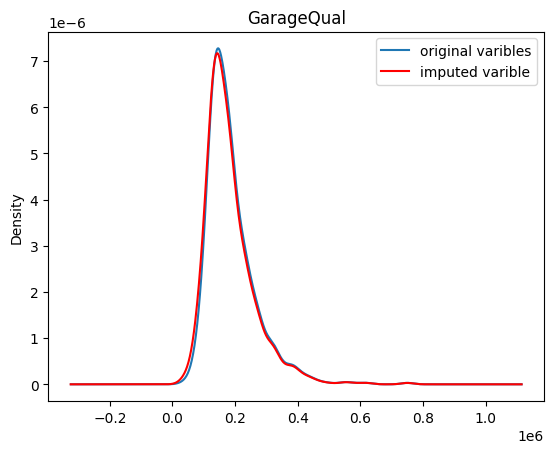

In [188]:
## original column vs  new column after filling ta in missing places
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind = 'kde' , ax = ax)

# distribution of the variable after the imputation
v[v['GarageQual'] == 'TA']['SalePrice'].plot(kind = 'kde' , ax = ax, color = 'red')

lines , labels = ax.get_legend_handles_labels()
labels = ['original varibles' , 'imputed varible']
ax.legend(lines , labels , loc = 'best')

# add title
plt.title('GarageQual')




<Axes: xlabel='FireplaceQu'>

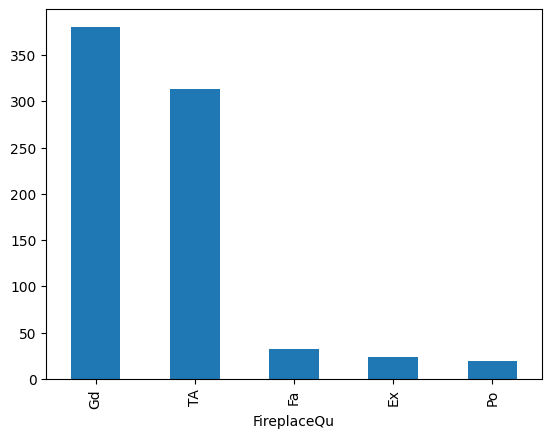

In [189]:
# now we are gonna do for fireplace
# here is on eproblem is that two categories are almost equal
# mode result is more fine when  any category dominate to every categoty
# ig it fails , results tends to bad
v['FireplaceQu'].value_counts().plot(kind='bar')

In [190]:
v['FireplaceQu'].mode()


,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

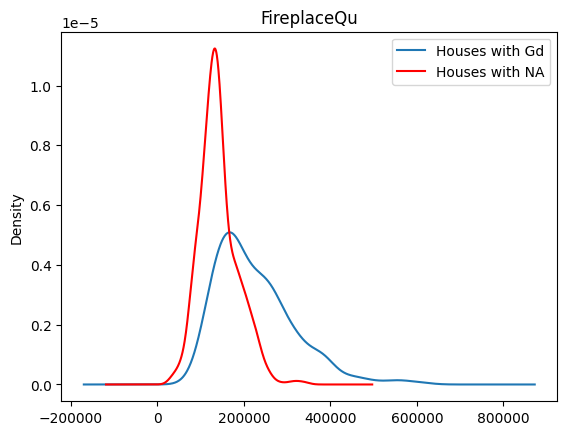

In [191]:

fig = plt.figure()
ax = fig.add_subplot(111)
v[v['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

v[v['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [192]:

temp = v[v['FireplaceQu'] == 'Gd']['SalePrice']

In [193]:
# here we are filling or doing imputation
v['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

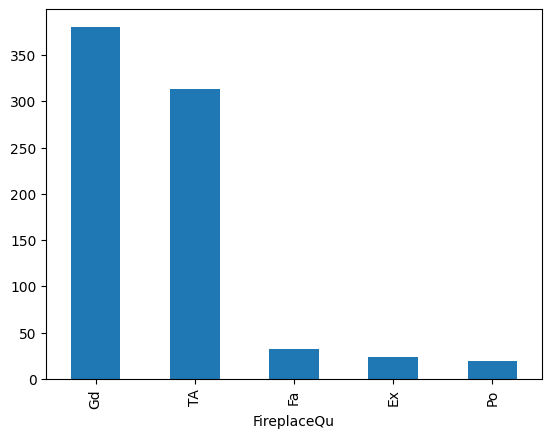

In [204]:

v['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

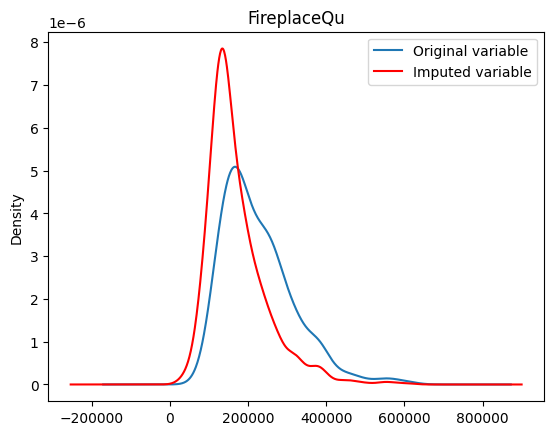

In [195]:

fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
v[v['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

## here we could see that gd and ta is almost same so mode will
## not efficient because mode is only better when missing data
## is missing lesser than 10 percent the column data


In [211]:
v['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

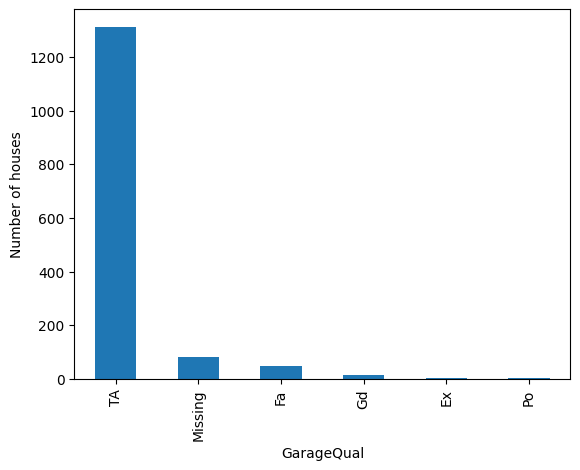

In [212]:
v['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [200]:
## by above methods we could fill missing places in fireplaces too...

**by using sklearn**: how we impute..lets see..

In [216]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(v.drop(labels = ['SalePrice'] , axis = 1) , v['SalePrice'] , test_size = 0.3 , random_state = 0)

In [217]:
from sklearn.impute import SimpleImputer



# Create the imputer
imputer = SimpleImputer(strategy= 'most_frequent')

# Fit and transform on training set
x_train = imputer.fit_transform(x_train)

# Transform test set using the same fitted imputer
x_test = imputer.transform(x_test)


In [218]:
imputer.statistics_
## by first column gd is most frequent and for second
# ta is most frequent

array(['Gd', 'TA'], dtype=object)

**above code is  of 1st technique by mode but by using sklearn but i think
its incomplete**

  ## **2nd technique**

  **making separate missing column**

In [219]:
v['GarageQual'].fillna('Missing' , inplace = True)

Text(0, 0.5, 'Number of houses')

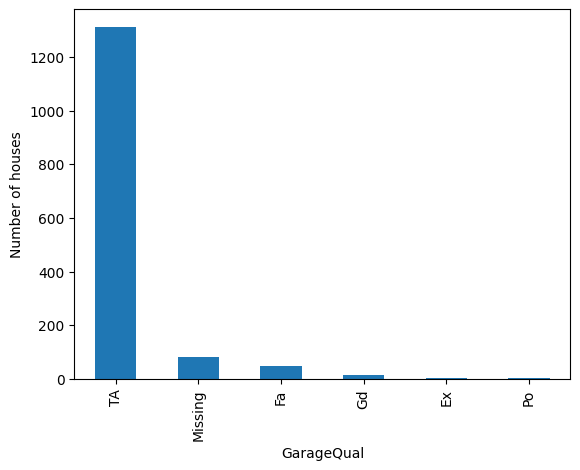

In [223]:
v['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

## **2nd technique by using  sklearn**

 ## making separate column of missing

In [225]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(v.drop(labels = ['SalePrice'] , axis = 1) , v['SalePrice'] , test_size = 0.3 , random_state = 0)

In [229]:
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(strategy= 'constant' , fill_value ='missing')

In [230]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [231]:
imputer.statistics_

## here output is written  missing two times because we  have filled
# missing world in missing values in two columns ....

array(['missing', 'missing'], dtype=object)